<a href="https://colab.research.google.com/github/aquarius31/Crime-Predictor/blob/master/Decision_Tree_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pydotplus
from IPython.display import Image 
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
# Read the dataset
crimes_stacked = pd.read_csv('gdrive/My Drive/Crime Predictor/crimes_stacked.csv', index_col=None)

In [0]:
# Get rid of useless columns
X = crimes_stacked[['Arrest', 'Domestic', 'Beat', 'Community Area',
                   'Latitude', 'Longitude', 'Year', 'Hour', 'Closest police station']]
# Extract the target feature
y = crimes_stacked['Primary Type']

In [0]:
# Converting into dummy features for scikit-learn
# X = pd.get_dummies(X, prefix='is_') 
# Fill Nan with 0
X = X.fillna(0)
# Gather column names
feature_names = list(X)
target_names = list(y)

In [0]:
# Separate data into training and testing datasets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [0]:
# Parameters to be tested
parameters = {'criterion':['gini', 'entropy'], 'max_depth':[None, 2, 3]}
# Use grid search with 3 K-Fold to find the best parameters
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=3, random_state=seed)
# Comparison
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=kfold, scoring=scoring)
clf.fit(X_train, y_train)
print("Best estimator: ", clf.best_estimator_)

Best estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [0]:
# Train with the best parameters
dt = clf.best_estimator_
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
importances = dt.feature_importances_
std = np.std([importances],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

importance_to_plot = []
for f in range(X.shape[1]):
    if(importances[indices[f]]):
        importance_to_plot.append(importances[indices[f]])
        print("%d. feature %s (%f)" % (f + 1, feature_names[f], importances[indices[f]]))

Feature ranking:
1. feature Arrest (0.201825)
2. feature Domestic (0.198337)
3. feature Beat (0.187820)
4. feature Community Area (0.153025)
5. feature Latitude (0.109669)
6. feature Longitude (0.051673)
7. feature Year (0.046490)
8. feature Hour (0.037946)
9. feature Closest police station (0.013216)


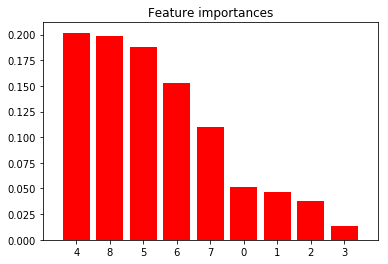

In [0]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, len(importance_to_plot)])
plt.show()

In [0]:
# Plot and store the decision tree
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("DecisionTree.pdf")
Image(graph.create_png()) 